# Latin Difficulty Clustering
**(CL/AI Task III)**


In [3]:
import re
from cltk import NLP
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

# Tag Sentences

In [13]:
tagged_sentences = []

with open('corpus.txt', 'r') as f:
	corpus = f.read()

cltk_nlp = NLP(language="lat")
cltk_doc = cltk_nlp.analyze(text=corpus)

for sentence in cltk_doc.sentences:
    sent_pos = ""
    sent_clean = ""
    for word in sentence.words:
        if(sent_pos == ""):
            sent_pos += word.pos.name
            sent_clean += word.string
        else:
            sent_pos += " " + word.pos.name
            sent_clean += " " + word.string
    sent_obj = {
        "sentence": sent_clean, 
        "pos":sent_pos, 
        "sent_obj": sentence
    }
    tagged_sentences.append(sent_obj)
    # print(sent_clean)

df = pd.DataFrame(tagged_sentences)


‎𐤀 CLTK version '1.1.1'.
Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.


## Export for Task 5 

# Clustering

In [49]:
df['sent_length'] = df.sentence.apply(lambda x: len(x.split()))
df['unique_pos_tags'] = df.pos.apply(lambda x: len(set(x.split())))

df['non_alpha_num'] = df.pos.apply(lambda x: x.split().count("punctuation"))
df['verb_number'] = df.pos.apply(lambda x: x.split().count("verb"))

feature_df = df[['sent_length','unique_pos_tags', 'non_alpha_num', 'verb_number']]

In [64]:
### Get all the features columns except the class
features = list(feature_df.columns)[:-1]
feature_data = df[features]

# clustering
clustering_kmeans = KMeans(init='k-means++', n_clusters=3)
predictions = clustering_kmeans.fit_predict(feature_data)
df['type'] = predictions

# Evaluation

### Interpretation

In [65]:
print(df[['sentence','type']][42:45])

df.loc[df['type'] == df['type'][42], 'type'] = "complex"
df.loc[df['type'] == df['type'][43], 'type'] = "simple"
df.loc[df['type'] == df['type'][44], 'type'] = "intermediate"

                                             sentence  type
42  Num infitiari potes te illo ipso die meis prae...     2
43                                             Quid ?     1
44  cum te Praeneste Kalendis ipsis Novembribus oc...     0


### Visualization

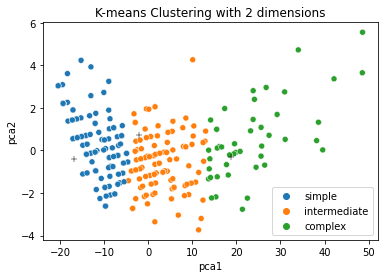

In [48]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(feature_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results['labels'] = df['type']

centers = pd.DataFrame(clustering_kmeans.cluster_centers_, columns=features)
reduced_centers = PCA(n_components=pca_num_components).fit_transform(centers)
pca_centers = pd.DataFrame(reduced_centers, columns=['pca1', 'pca2'])


sns.scatterplot(x="pca1", y="pca2", hue=results['labels'], data=results)
sns.scatterplot(x="pca1", y="pca2", data=pca_centers, color="black", marker="+")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

### Quality

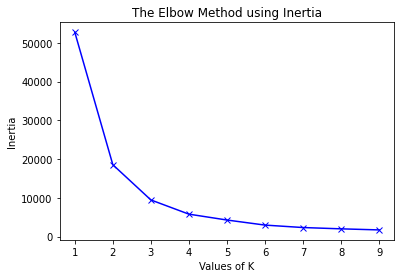

In [67]:
inertias = []
K = range(1, 11)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(feature_data)
    kmeanModel.fit(feature_data)
    inertias.append(kmeanModel.inertia_)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [12]:
df[['sentence', 'type']].to_csv("./latin_difficulty.csv", sep='\t')